In [1]:
from simulation_functions import *
from simulation_plotting import *

import matplotlib.pyplot as plt

# Background

## Dynamical System

Dynamical systems can be modeled by the fast-slow system

$dx=f(x,y)dt+\sigma dW$

$dy=\epsilon dt$

where $x$ is a fast variable and $y$ is a slow variable. The fast variable $x$ is affected by a deterministic function $f(x,y)$ with noise $\sigma dW$. The slow variable $y$ is slowly changing according to the time scale separation $\epsilon$.

## Euler-Maruyama Method

The Euler-Maruyama method is used to numerically simulate the system. The explicit update equations are

$x_{n+1}=x_n+f(x,y)h+\sigma\Delta W$

$y_{n+1}=y_n+\epsilon h$

where $h$ is the time step and $\Delta W\sim N(0,h)$.

# Simulation Set Up

In [3]:
sigma = 0.1  # noise level
epsilon = 0.02  # time scale separation
h = 0.1  # time step size

y0 = -1  # initial y value
yf = 0.5  # final y value

T = (yf - y0) / epsilon  # duration of run

# Sample Runs

We simulated the fast-slow system with several forms of $f(x,y)$ that exhibit different types of bifurcations.

## Fold Bifurcation

The normal form of the fold bifurcation is $f(x,y)=-y-x^2$.

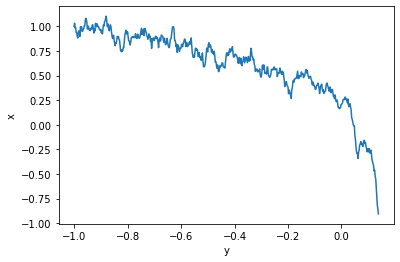

In [4]:
f1 = lambda x, y: -y-x**2  # normal form function

(x0, y0) = (1, -1)  # initial conditions
path = sample_path(f1, x0, y0, T, h, sigma, epsilon, bounds=(-1, np.inf))

fig, ax = plt.subplots()
plot_sample_path(ax, path)

## Transcritical Bifurcation

The normal form of the transcritical bifurcation is $f(x,y)=yx-x^2$.

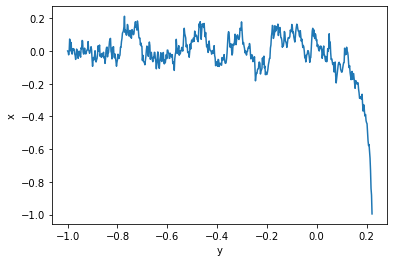

In [5]:
f2 = lambda x, y: y*x-x**2  # normal form function

(x0, y0) = (0, -1)  # initial conditions
path = sample_path(f2, x0, y0, T, h, sigma, epsilon, bounds=(-1, np.inf))

fig, ax = plt.subplots()
plot_sample_path(ax, path)

## Pitchfork Bifurcation

The normal form of the pitchfork bifurcation is $f(x,y)=yx+x^3$.

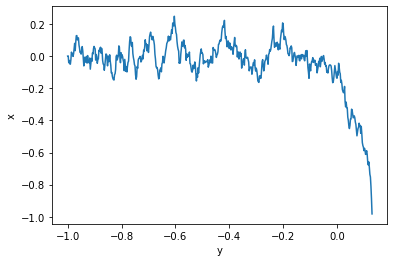

In [6]:
f3 = lambda x, y: y*x+x**3

(x0, y0) = (0, -1)  # initial conditions
path = sample_path(f3, x0, y0, T, h, sigma, epsilon, bounds=(-1, 1))

fig, ax = plt.subplots()
plot_sample_path(ax, path)

# Ensemble of Sample Runs

We simulated an ensemble of sample paths and compared them to the equilibria for each bifurcation normal form.

## Fold Bifurcation

In this fold bifurcation, two equilibria "vanish" at the bifurcation point $y=0$.

For $y<0$, there exists a stable equilibrium $x=\sqrt{-y}$ and an unstable equilibrium $x=-\sqrt{-y}$. For $y>0$, there exists no equilibria.

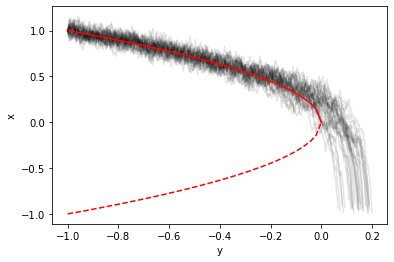

In [7]:
(x0, y0) = (1, -1)  # initial conditions
paths1 = ensemble_paths(f1, x0, y0, T, h, sigma, epsilon, bounds=(-1, np.inf))

equilibria1 = [
    {   # unstable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: -np.sqrt(-y),
        "stable": False
    },
    {   # stable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: np.sqrt(-y),
        "stable": True
    },
]

fig, ax = plt.subplots()
plot_ensemble(ax, paths1.iloc[:,:30], equilibria1)

## Transcritical Bifurcation

In this transcritical bifurcation, two equilibria switch stabilities at the bifurcation point $y=0$.

For $y<0$, there exists a stable equilibrium $x=0$ and an unstable equilibrium $x=y$. For $y>0$, there exists a stable equilibrium $x=y$ and an unstable equilibrium $x=0$.

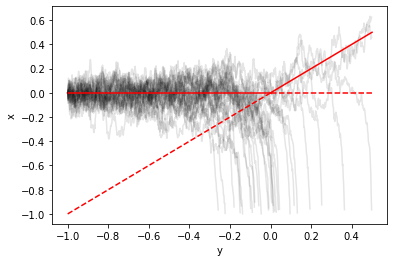

In [8]:
(x0, y0) = (0, -1)  # initial conditions
paths2 = ensemble_paths(f2, x0, y0, T, h, sigma, epsilon, bounds=(-1, np.inf))

equilibria2 = [
    {   # unstable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: y,
        "stable": False
    },
    {   # stable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: 0,
        "stable": True
    },
    {   # unstable equilibria after bifurcation point
        "range": (0, yf),
        "func": lambda y: y,
        "stable": True
    },
    {   # stable equilibria after bifurcation point
        "range": (0, yf),
        "func": lambda y: 0,
        "stable": False
    }
]

fig, ax = plt.subplots()
plot_ensemble(ax, paths2.iloc[:,:30], equilibria2)

## Pitchfork Bifurcation

In this pitchfork bifrucation, two unstable equilibria and one stable equilibrium "vanish" at the bifurcation point $y=0$.

For $y<0$, there exists a stable equilibrium $x=0$ and two unstable equilibria $x=\pm\sqrt{-y}$. For $y>0$, there exists no equilibria.

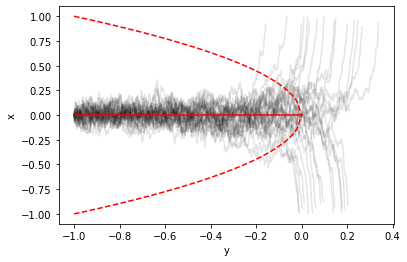

In [9]:
(x0, y0) = (0, -1)  # initial conditions
paths3 = ensemble_paths(f3, x0, y0, T, h, sigma, epsilon, bounds=(-1, 1))

equilibria3 = [
    {   # unstable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: -np.sqrt(-y),
        "stable": False
    },
    {   # unstable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: np.sqrt(-y),
        "stable": False
    },
    {   # stable equilibria before bifurcation point
        "range": (y0, 0),
        "func": lambda y: 0,
        "stable": True
    }
]

fig, ax = plt.subplots()
plot_ensemble(ax, paths3.iloc[:,:30], equilibria3)

# Escaped Trajectories

We calculated the percentage of sample paths that fall outside the unescapable domain at each $y$ value for each bifurcation normal form. The domains take the unstable equilibria as boundaries.

## Fold Bifurcation

The domain of $x$ values for the fold bifurcation is $(-\sqrt{-y},0)$ for $y<0$.

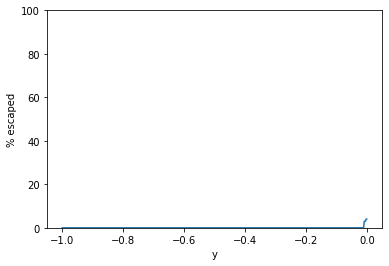

In [10]:
bounds = lambda y: (-np.sqrt(-y), np.inf)
percent_escaped1 = escaped_trajectories(paths1[paths1.index < 0], bounds)

fig, ax = plt.subplots()
plot_escaped(ax, percent_escaped1)

## Transcritical Bifurcation

The domain of $x$ values for the transcritical bifurcation is $(y,\infty)$ for $y<0$ and $(0,\infty)$ for $y>0$.

c:\Python310\lib\site-packages\numpy\lib\function_base.py:2411: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


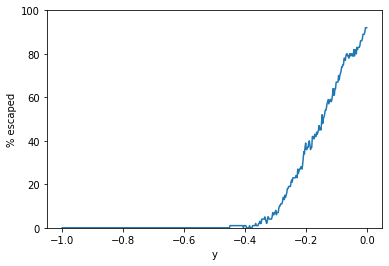

In [11]:
bounds = lambda y: (y, np.inf) if y < 0 else (0, np.inf)
percent_escaped2 = escaped_trajectories(paths2[paths2.index < 0], bounds)

fig, ax = plt.subplots()
plot_escaped(ax, percent_escaped2)

## Pitchfork Bifurcation

The domain of $x$ values for the pitchfor bifurcation is $(-\sqrt{-y},\sqrt{-y})$ for $y<0$.

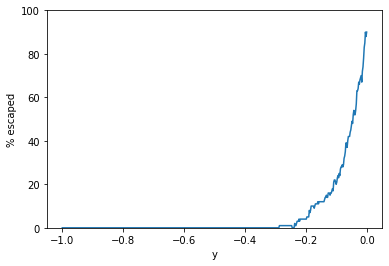

In [12]:
bounds = lambda y: (-np.sqrt(-y), np.sqrt(-y))
percent_escaped3 = escaped_trajectories(paths3[paths3.index < 0], bounds)

fig, ax = plt.subplots()
plot_escaped(ax, percent_escaped3)

# Probability Distributions

We graphed the histogram of $x$ values at a given $y$ value and compared them to the Fokker-Planck steady state distribution.

The given Fokker-Planck equations are only valid before the bifurcation point $y<0$ and become less reliable close to the bifurcation point due to the violation of the steady state assumption.

In [13]:
xlim = (-1, 1)  # x range of histogram
y = -0.5  # given y value

## Fold Bifurcation

The stationary density for the fold bifurcation is

$p^y_s(x)=\frac{1}{N}\exp(\frac{2}{\sigma^2}[-yx-\frac{1}{3}x^3+\frac{2}{3}(-y)^{3/2}])$

where $N$ is the normalisation constant calculated between the bounds $(-\sqrt{-y},\infty)$.

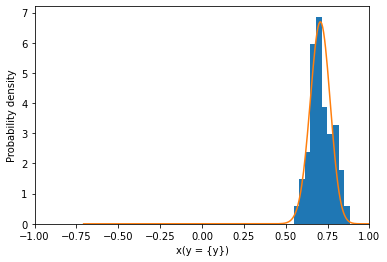

In [14]:
pdf1 = lambda x, y: np.exp(2/sigma**2*(-y*x - 1/3*x**3 + 2/3*(-y)**(3/2)))
domain1 = lambda y: (-np.sqrt(-y), 5)

fig, ax = plt.subplots()
plot_distribution(ax, paths1, y, pdf1, xlim, domain1)

## Transcritical Bifurcation

The stationary density for the transcritical bifurcation is

$p^y_s(x)=\frac{1}{N}\exp(\frac{2}{\sigma^2}[\frac{1}{2}yx^2-\frac{1}{3}x^3-\frac{1}{6}y^3])$

where $N$ is the normalisation constant calculated between the bounds $(y,\infty)$.

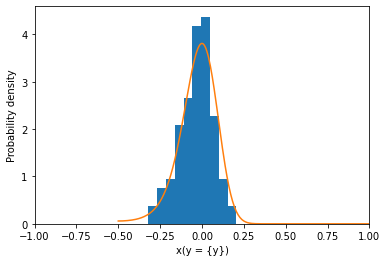

In [15]:
pdf2 = lambda x, y: np.exp(2/sigma**2*(1/2*y*x**2 - 1/3*x**3 - 1/6*y**3))
domain2 = lambda y: (y, 5)

fig, ax = plt.subplots()
plot_distribution(ax, paths2, y, pdf2, xlim, domain2)

## Pitchfork Bifurcation

The stationary density for the pitchfork bifurcation is

$p^y_s(x)=\frac{1}{N}\exp(\frac{2}{\sigma^2}[\frac{1}{2}yx^2+\frac{1}{4}x^4+\frac{1}{4}y^2])$

where $N$ is the normalisation constant calculated between the bounds $(-\sqrt{-y},\sqrt{-y})$.

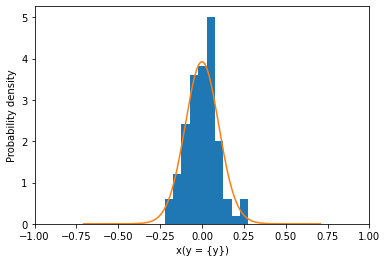

In [16]:
pdf3 = lambda x, y: np.exp(2/sigma**2*(1/2*y*x**2 + 1/4*x**4 + 1/4*y**2))
domain3 = lambda y: (-np.sqrt(-y), np.sqrt(-y))

fig, ax = plt.subplots()
plot_distribution(ax, paths3, y, pdf3, xlim, domain3)

# Surface Plots

I calculated the stationary densities over the (x, y) grid and plotted the ensemble of sample paths over them.

## Fold Bifurcation

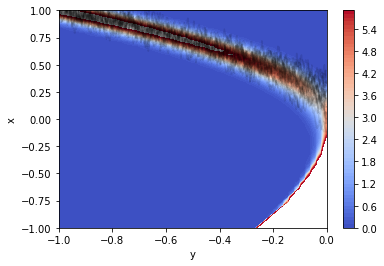

In [17]:
pxy1 = probability_grid((-1, 1), (-1, 0), pdf1, domain1)

fig, ax = plt.subplots()
contour = plot_probability_grid(ax, pxy1, paths1, ylim=(-1, 1))
fig.colorbar(contour)

## Transcritical Bifurcation

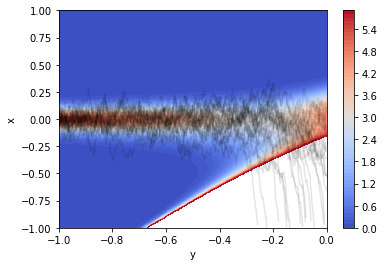

In [18]:
pxy2 = probability_grid((-1, 1), (-1, 0), pdf2, domain2)

fig, ax = plt.subplots()
contour = plot_probability_grid(ax, pxy2, paths2)
fig.colorbar(contour)

## Pitchfork Bifurcation

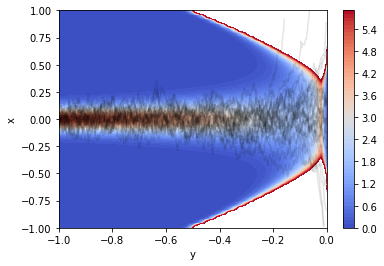

In [19]:
pxy3 = probability_grid((-1, 1), (-1, 0), pdf3, domain3)

fig, ax = plt.subplots()
contour = plot_probability_grid(ax, pxy3, paths3)
fig.colorbar(contour)

## Variance

I plotted the estimate variance and analytical variance for each $y$ value.

The estimate variance is obtained from the distribution of $x$ values at each $y$ value.

The analytical variance is obtained from the stationary density equation:

$\bar{x}=\frac{1}{N}\int_a^b xp^y_s(x)dx$

$\sigma^2=\frac{1}{N}\int_a^b (x-\bar{x})^2 p^y_s(x)dx$

where $N$ is the normalisation constant calculated between the bounds $(a,b)$.

## Fold Bifurcation

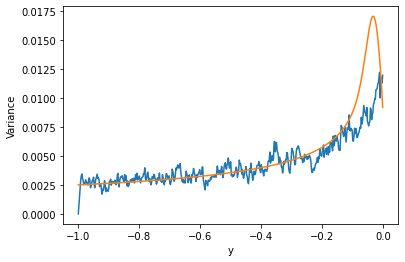

In [20]:
estimate_var1 = estimate_variance(paths1, domain1)
analytical_var1 = analytical_variance(paths1, domain1, pdf1)

fig, ax = plt.subplots()
plot_variance(ax, estimate_var1, analytical_var1)

## Transcritical Bifurcation

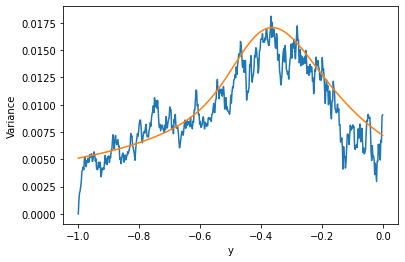

In [21]:
estimate_var2 = estimate_variance(paths2, domain2)
analytical_var2 = analytical_variance(paths2, domain2, pdf2)

fig, ax = plt.subplots()
plot_variance(ax, estimate_var2, analytical_var2)

## Pitchfork Bifurcation

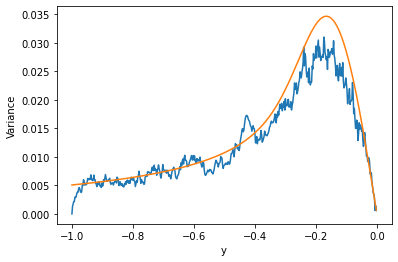

In [22]:
estimate_var3 = estimate_variance(paths3, domain3)
analytical_var3 = analytical_variance(paths3, domain3, pdf3)

fig, ax = plt.subplots()
plot_variance(ax, estimate_var3, analytical_var3)

# Plot Summary

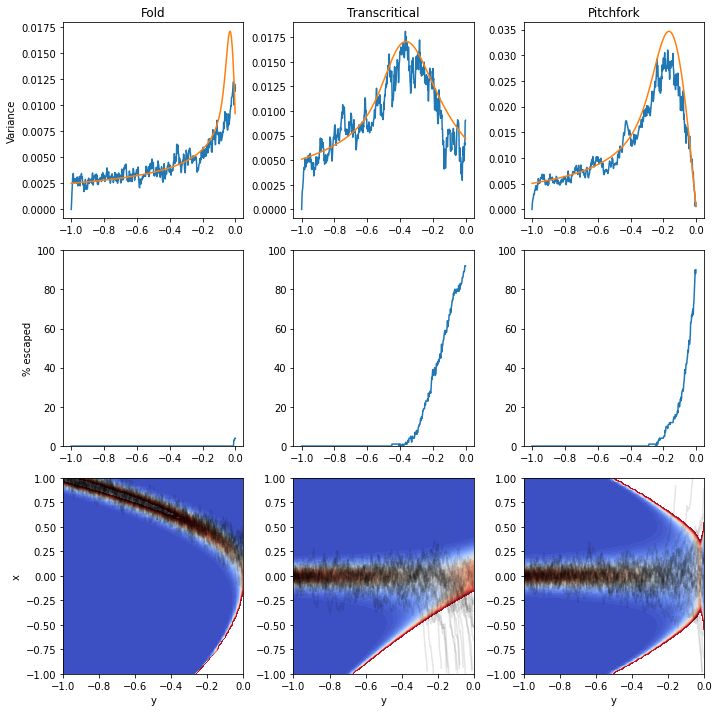

In [23]:
fig, axs = plt.subplots(ncols=3, nrows=3)

titles = ["Fold", "Transcritical", "Pitchfork"]
ylabels = ["Variance", "% escaped", "x"]
estimate_var = [estimate_var1, estimate_var2, estimate_var3]
analytical_var = [analytical_var1, analytical_var2, analytical_var3]
percent_escaped = [percent_escaped1, percent_escaped2, percent_escaped3]
pxy = [pxy1, pxy2, pxy3]
paths = [paths1, paths2, paths3]

for i in range(3):
    axs[i][0].set_ylabel(ylabels[i])
    axs[0][i].set_title(titles[i])
    axs[2][i].set_xlabel("y")

    plot_variance(axs[0][i], estimate_var[i], analytical_var[i], labels=False)

    plot_escaped(axs[1][i], percent_escaped[i], labels=False)

    plot_probability_grid(axs[2][i], pxy[i], paths[i], labels=False, ylim=(-1, 1))

fig.set_size_inches(10, 10)
fig.tight_layout()